<a href="https://colab.research.google.com/github/branchwag/pytorchin/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Pytorch workflow
# https://www.learnpytorch.io/01_pytorch_workflow/

import torch
from torch import nn ##neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [56]:
#1. Prepping and Loading Data
#linear regression y = a + bX
#known params
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = bias + weight * X

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [57]:
len(X), len(y)

(50, 50)

In [58]:
#splitting data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [59]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [60]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

#are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

#show legend
  plt.legend(prop={"size": 14})

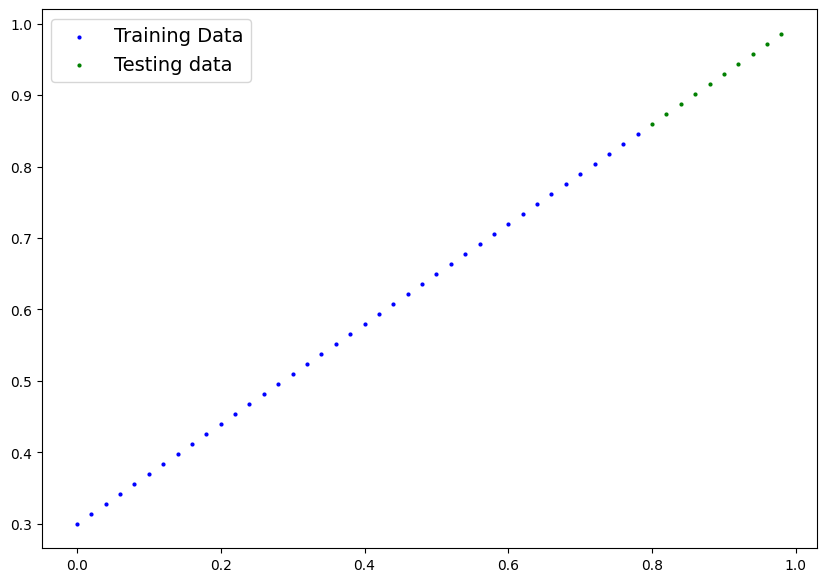

In [61]:
plot_predictions();

In [62]:
##Build model
#create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) #gradient descent and backpropagation
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) #gradient descent and backpropagation

    #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias #linear regression formula

In [63]:
#torch.randn(1)

##Looking at model
#creating a random seed
torch.manual_seed(42)

#create an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()

#check out params
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [64]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [65]:
weight,bias

(0.7, 0.3)

In [66]:
#Making predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [67]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

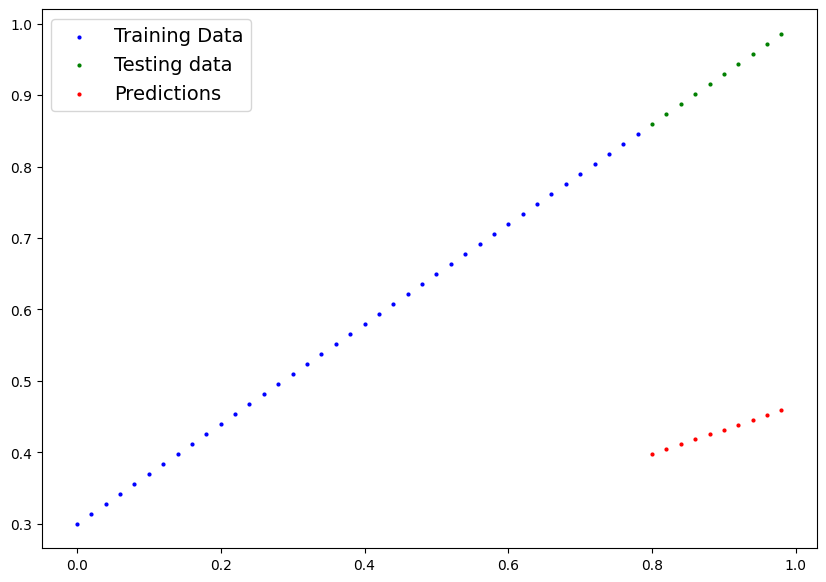

In [68]:
plot_predictions(predictions=y_preds)

In [69]:
## Train model
# loss function and optimizer used will depend on problem set. This is a regression problem, so using L1 Loss and SGD as the optimizer
#loss function
loss_fn = nn.L1Loss()

#optimizer (using stochastic gradient descent here)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)




In [70]:
###Building a training loop and a testing loop
torch.manual_seed(42)
#TRAINING
#Loop through data
#Forward pass/prop - moving data through forward methods. Predictions.
#Calc loss
#Optimizer zero grad
#Loss backward (back prop)
#Optimizer step - adjust params (gradient descent)

epochs = 100 #one loop through data
for epoch in range(epochs):

  #set model to training mode
  model_0.train() #require gradient

  #forward pass
  y_pred = model_0(X_train)

  #calc loss
  loss = loss_fn(y_pred, y_train) #input, target
  print(f"Loss: {loss}")

  optimizer.zero_grad()

  loss.backward() #back prop

  optimizer.step() #adjust model params to try and improve loss, gradient descent

#TESTING
  model_0.eval() #turns off different settings not needed for testing
  with torch.inference_mode(): # turns off gradient tracking
    #forward pass
    test_pred = model_0(X_test)
    #calc loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())


Loss: 0.31288138031959534
Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

In [71]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [72]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [73]:
weight, bias

(0.7, 0.3)

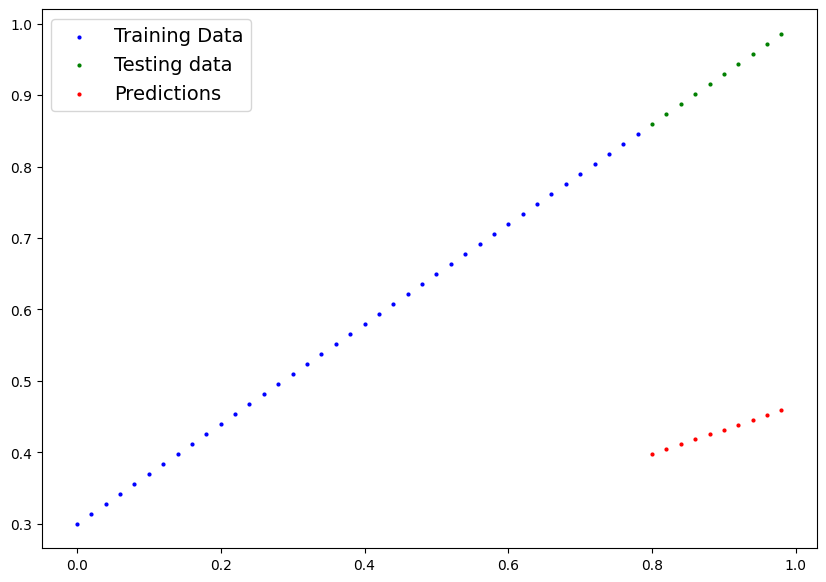

In [74]:
plot_predictions(predictions=y_preds);

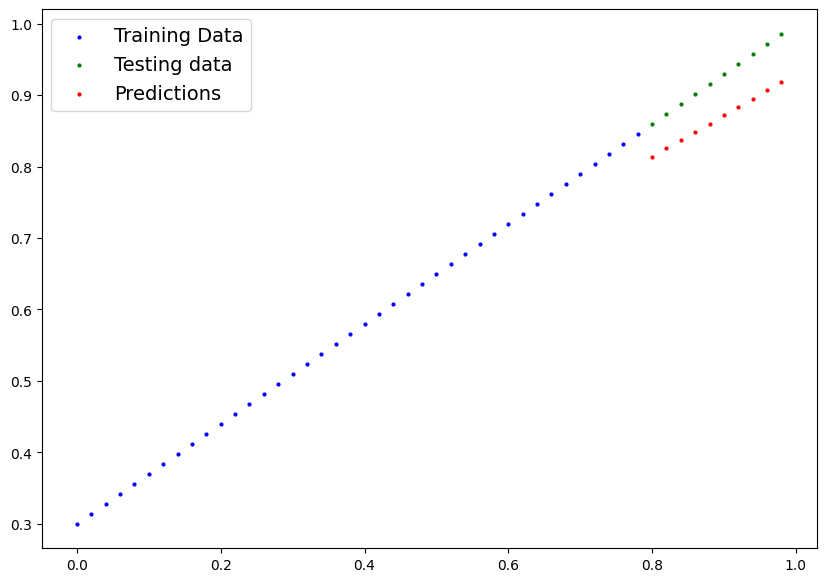

In [75]:
plot_predictions(predictions=y_preds_new)